In [104]:
import matplotlib.pyplot as plt
import numpy as np
import kneed
import pickle
import os

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA

from datasets import *

In [105]:
def train_kmeans(dataset):
    path = f"readings/kmeans_{dataset}.pkl"
    if os.path.exists(path): pickle.load(open(path, 'rb'))
        
    X, y = load_dataset(dataset)
    n_clusters = [2, 4, 8, 16, 32, 48, 64]
    out = {}
    for k in n_clusters:
        kmeans = KMeans(k)
        y_pred = kmeans.fit_predict(X)
        score = calinski_harabasz_score(X, y_pred)
        out[k] = (kmeans, score)
        print(k, score)
    
    pickle.dump(out, open(path, 'wb'))
    return out

In [106]:
X, y = load_credit_score()

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3251: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [107]:
train_kmeans('term_deposits')

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3216: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


2 14036.82471492004
4 8366.614984098154
8 5607.365748117427
16 3556.392589857755
32 2191.414337609816
48 1618.3842701873848
64 1304.7548728397846


{2: (KMeans(n_clusters=2), 14036.82471492004),
 4: (KMeans(n_clusters=4), 8366.614984098154),
 8: (KMeans(), 5607.365748117427),
 16: (KMeans(n_clusters=16), 3556.392589857755),
 32: (KMeans(n_clusters=32), 2191.414337609816),
 48: (KMeans(n_clusters=48), 1618.3842701873848),
 64: (KMeans(n_clusters=64), 1304.7548728397846)}

In [108]:
train_kmeans('credit_score')

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3251: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


2 19737.052100103814
4 10903.133207489796
8 7040.281936091837
16 4903.158790272402
32 3300.180848056724
48 2572.1826032729864
64 2103.983444071135


{2: (KMeans(n_clusters=2), 19737.052100103814),
 4: (KMeans(n_clusters=4), 10903.133207489796),
 8: (KMeans(), 7040.281936091837),
 16: (KMeans(n_clusters=16), 4903.158790272402),
 32: (KMeans(n_clusters=32), 3300.180848056724),
 48: (KMeans(n_clusters=48), 2572.1826032729864),
 64: (KMeans(n_clusters=64), 2103.983444071135)}

In [109]:
def train_gmm(dataset):
    path = f"readings/gmm_{dataset}.pkl"
    if os.path.exists(path): pickle.load(open(path, 'rb'))
        
    X, y = load_dataset(dataset)
    n_clusters = [2, 4, 8, 16, 32, 48, 64]
    out = {}
    for k in n_clusters:
        gmm = GauGaussianMixtureanMixture(k)
        y_pred = gmm.fit_predict(X)
        score = calinski_harabasz_score(X, y_pred)
        out[k] = (gmm, score)
        print(k, score)
    
    pickle.dump(out, open(path, 'wb'))
    return out

In [110]:
train_gmm('term_deposits')

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3216: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


2 13975.051397925488
4 6609.907633746095
8 5727.081902619351
16 3087.398591641744
32 1771.7467561512344
48 1285.7442919003138
64 1007.5601354129955


{2: (GaussianMixture(n_components=2), 13975.051397925488),
 4: (GaussianMixture(n_components=4), 6609.907633746095),
 8: (GaussianMixture(n_components=8), 5727.081902619351),
 16: (GaussianMixture(n_components=16), 3087.398591641744),
 32: (GaussianMixture(n_components=32), 1771.7467561512344),
 48: (GaussianMixture(n_components=48), 1285.7442919003138),
 64: (GaussianMixture(n_components=64), 1007.5601354129955)}

In [111]:
train_gmm('credit_score')

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3251: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


2 16565.564175976113
4 7129.741527051317
8 3133.2115539409547
16 1561.8229638814303
32 873.4371112274167
48 876.5112905517924
64 590.4800117664515


{2: (GaussianMixture(n_components=2), 16565.564175976113),
 4: (GaussianMixture(n_components=4), 7129.741527051317),
 8: (GaussianMixture(n_components=8), 3133.2115539409547),
 16: (GaussianMixture(n_components=16), 1561.8229638814303),
 32: (GaussianMixture(n_components=32), 873.4371112274167),
 48: (GaussianMixture(n_components=48), 876.5112905517924),
 64: (GaussianMixture(n_components=64), 590.4800117664515)}

In [112]:
def load_scores(key):
    data = pickle.load(open(f"readings/{key}.pkl", "rb"))
    return tuple(zip(*[(n, x[1]) for n, x in data.items()]))

In [130]:
nclusters, score = load_scores('gmm_term_deposits')

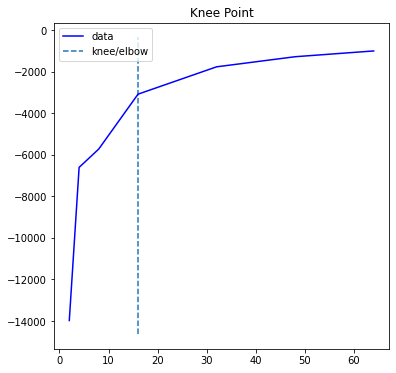

In [136]:
knee = kneed.KneeLocator(nclusters, -np.array(score))
knee.plot_knee()

In [200]:
dataset = 'credit_score'
algo = 'kmeans'

X, y = load_dataset(dataset)
data = pickle.load(open(f"readings/{algo}_{dataset}.pkl", "rb"))

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3251: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

def score(X, y, model):
    tree = DecisionTreeClassifier(class_weight='balanced')
    newX = model.predict(X).reshape((-1, 1))
    tree.fit(newX, y)
    return f1_score(y, tree.predict(newX), average='macro')


nclusters = []
scores = []
for n, (model, _) in data.items():
    nclusters.append(n)
    scores.append(score(X, y, model))

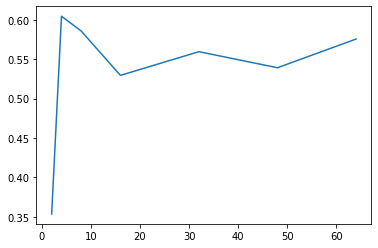

In [202]:
plt.plot(nclusters, scores)

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

In [209]:
boost = GradientBoostingClassifier(max_depth=8, n_estimators=400)

In [213]:
from sklearn.decomposition import PCA, FastICA

In [296]:
for n in [2, 4, 8, 16, 32, 48, 64]:
    ica = FastICA(n, whiten='unit-variance')
    ica.fit(X)
    print(n, kurtosis(ica.transform(X), axis=0).mean())

2 -0.4906784161475022
4 8.652832398926428


/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


8 19.318156970636498
16 14.334657714354384
32 9.677557957785847


/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:519: UserWarning: n_components is too large: it will be set to 56
  warnings.warn(


48 7.977143117745374
64 3.0980037902029656


/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [297]:
t = """2 -0.4906784161475022
4 8.652832398926428
8 19.318156970636498
16 14.334657714354384
32 9.677557957785847
48 7.977143117745374
64 3.0980037902029656""".split('\n')

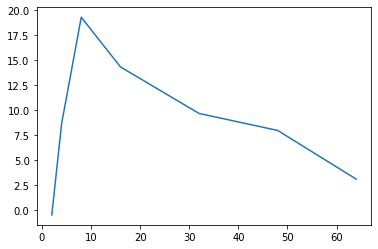

In [300]:
plt.plot(*list(zip(*[list(map(float, a.split(' '))) for a in t])))

In [224]:
from scipy.stats import kurtosis

In [238]:
kurtosis(X, axis=0).mean()

6.612601325346887

In [295]:
ica.mean_.shape

(56,)

In [236]:
((X - X.mean(axis=0))**4).mean()

4.400292254367207

In [268]:
mean2

0.11261931621674294

6.612601325346887

In [240]:
((X - X.mean(axis=0))**2).mean(axis=0)**2

array([0.00345479, 0.00354161, 0.00341786, 0.00326782, 0.00353641,
       0.00335567, 0.00326581, 0.00377327, 0.00315421, 0.00347538,
       0.00341479, 0.00309314, 0.00348363, 0.00339742, 0.00306768,
       0.00430767, 0.02366422, 0.03390792, 0.05369335, 0.02597454,
       0.0111626 , 0.05265029, 0.06222978, 0.00493141, 0.01401463,
       0.02091924, 0.01010838, 0.00872019, 0.01425571, 0.0361147 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.722466  , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.976144  , 1.        ,
       1.        , 0.8648628 , 1.        , 0.96108612, 1.        ,
       0.91242614])

In [76]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    kmeans = KMeans(k)
    y_pred = kmeans.fit_predict(X)
    score.append(calinski_harabasz_score(X, y_pred))
    print(k, score[-1])

2 14036.82471492004
4 8366.613520562352
8 5727.639141203562
16 3559.4197891812605
32 2174.316292276627
48 1614.526480523732
64 1309.7117479168016


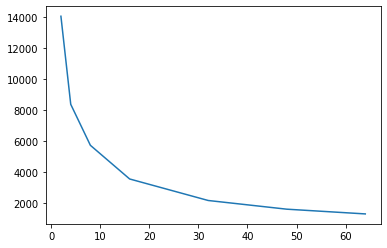

In [77]:
plt.plot(n_clusters, score)

In [81]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Knee:  16


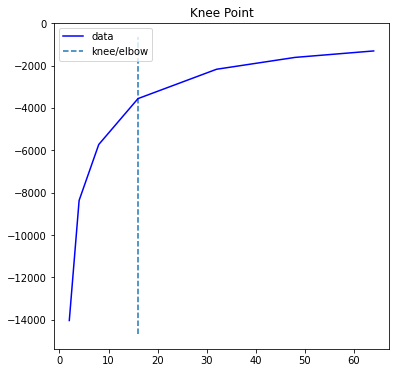

In [99]:
kneedle = kneed.KneeLocator(n_clusters, -np.array(score))
print('Knee: ', kneedle.knee)
kneedle.plot_knee()

Knee:  16


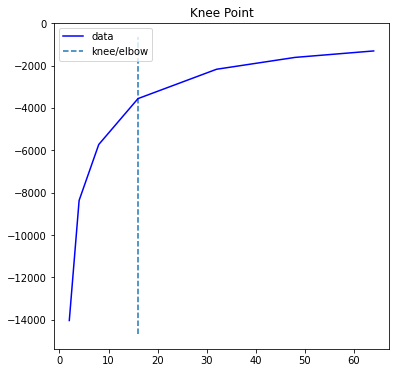

In [4]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    gmm = GaussianMixture(k)
    y_pred = gmm.fit_predict(X)
    score.append(calinski_harabasz_score(X, y_pred))
    print(k, score[-1])

2 16565.564175976113
4 7129.741527051317
8 3576.4626756020366
16 1643.3287382728386
32 1085.8128001439088
64 555.9431047127802


KeyboardInterrupt: 

In [9]:
pca = PCA()
pca.fit_transform(X);

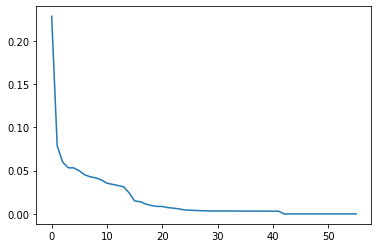

In [12]:
plt.plot(pca.explained_variance_ratio_)

In [58]:
pca = PCA(32)
X_trans = pca.fit_transform(X);

In [14]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    kmeans = KMeans(k)
    y_pred = kmeans.fit_predict(X_trans)
    score.append(calinski_harabasz_score(X_trans, y_pred))
    print(k, score[-1])

2 23516.187156809403
4 13184.379803284583
8 8713.024996834318
16 6298.197070555686
32 4401.962572090256
48 3578.901351359332
64 2976.4235874930596


In [69]:
kmeans = KMeans(16)
kmeans.fit(X_trans)

KMeans(n_clusters=16)

In [61]:
y_pred.shape

(100000, 1)

In [63]:
y_pred = kmeans.predict_proba(X_trans)

In [64]:
y_pred.shape

(100000, 16)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()
lr.fit(y_pred, y)
lr.score(y_pred, y)

0.59101

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
y_pred = kmeans.predict(X_trans).reshape((-1, 1))

In [71]:
lr = DecisionTreeClassifier()
lr.fit(y_pred, y)
lr.score(y_pred, y)

0.62841

In [30]:
acc = 0
tot = 0
for cluster_id in set(y_pred):
    tot += sum(y_pred == cluster_id)
    acc += np.eye(3)[y][y_pred == cluster_id].sum(axis=0).max()
acc/tot

0.62648

In [ ]:
error = np.sum((preds - X_train)**2, axis=1)
error.shape

In [ ]:
kmeans.cluster_centers_

In [ ]:
pca = PCA()
X2 = pca.fit_transform(X_train)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(X2[:,0], X2[:, 1], c=y_train)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()
X2 = tsne.fit_transform(X_train)

In [ ]:
plt.scatter(X2[:,0], X2[:, 1], c=y_train)